# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Mount Drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Dataset

In [ ]:
dataset = pd.read_csv('/content/gdrive/My Drive/You & Me/Sem 1/BA/BA Project - Spaceship Titanic/train.csv')
testDataset = pd.read_csv('/content/gdrive/My Drive/You & Me/Sem 1/BA/BA Project - Spaceship Titanic/test.csv')

# Analyze Data

In [ ]:
dataset.info()
testDataset.info()
dataset.describe()
testDataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000

#Analyzing Correlation Between Features via Heatmap



In [ ]:
correlation = dataset.corr()
correlation

Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported  -0.075026    -0.244611   0.046566      0.010141 -0.221131   

                VRDeck  Transported  
Age           0.101007    -0.075026  
RoomService  -0.019581    -0.244611  
FoodCourt     0.227995     0.046566  
ShoppingMall -0.007322     0.010141  
Spa           0.153821    -0.221131  
VRDeck        1.000000    -0.207075  
Transported  -0.207075     1.000000

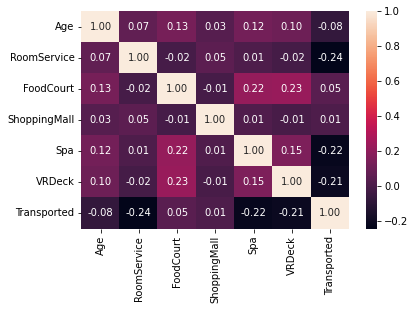

In [ ]:
sns.heatmap(correlation, annot = True, fmt=".2f")

# Modify Train and Test Datasets

# 1. Drop PassengerId and Name from Train and Test Dataset

---



In [ ]:
dataset.drop(['PassengerId'], axis = 1, inplace = True)
dataset.drop(['Name'], axis = 1, inplace = True)

testDataset.drop(['PassengerId'], axis = 1, inplace = True)
testDataset.drop(['Name'], axis = 1, inplace = True)

# 2. Split Cabin into Deck, Num and Side

In [ ]:
dataset[['Deck', 'Num', 'Side']] = dataset['Cabin'].str.split('/', expand = True)
dataset.drop(['Cabin'], axis = 1, inplace = True)

testDataset[['Deck', 'Num', 'Side']] = testDataset['Cabin'].str.split('/', expand = True)
testDataset.drop(['Cabin'], axis = 1, inplace = True)

# 3. Perform Mean Imputation for Missing Numerical Features

In [ ]:
numericalColumns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numericalColumns:
    dataset[col].fillna((dataset[col].mean()), inplace=True)
    testDataset[col].fillna((testDataset[col].mean()), inplace=True)

# 4. Perform Mode Imputation for Missing Categorical Features



In [ ]:
categoricalColumns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side']
for col in categoricalColumns:
    dataset[col].fillna((dataset[col].mode()[0]), inplace=True)
    testDataset[col].fillna((testDataset[col].mode()[0]), inplace=True)

# 5. Convert Categorical Data into Numerical Data

In [ ]:
labelencoder = LabelEncoder()
for col in categoricalColumns:
    dataset[col] = labelencoder.fit_transform(dataset[col])
    testDataset[col] =labelencoder.fit_transform(testDataset[col])

In [ ]:
dataset.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0          0.0        0.0   
1           0          0            2  24.0    0        109.0        9.0   
2           1          0            2  58.0    1         43.0     3576.0   
3           1          0            2  33.0    0          0.0     1283.0   
4           0          0            2  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  Deck  Num  Side  
0           0.0     0.0     0.0        False     1    0     0  
1          25.0   549.0    44.0         True     5    0     1  
2           0.0  6715.0    49.0        False     0    0     1  
3         371.0  3329.0   193.0        False     0    0     1  
4         151.0   565.0     2.0         True     5    1     1

In [ ]:
testDataset.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           0          1            2  27.0    0          0.0        0.0   
1           0          0            2  19.0    0          0.0        9.0   
2           1          1            0  31.0    0          0.0        0.0   
3           1          0            2  38.0    0          0.0     6652.0   
4           0          0            2  20.0    0         10.0        0.0   

   ShoppingMall     Spa  VRDeck  Deck   Num  Side  
0           0.0     0.0     0.0     6   820     1  
1           0.0  2823.0     0.0     5   927     1  
2           0.0     0.0     0.0     2     0     1  
3           0.0   181.0   585.0     2     1     1  
4         635.0     0.0     0.0     5  1029     1

# Split Data into Dependent Features and Target Variable

In [ ]:
Y = dataset['Transported']
dataset.drop(['Transported'], axis = 1, inplace = True)
X = dataset

In [ ]:
X

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0              1          0            2  39.0    0          0.0        0.0   
1              0          0            2  24.0    0        109.0        9.0   
2              1          0            2  58.0    1         43.0     3576.0   
3              1          0            2  33.0    0          0.0     1283.0   
4              0          0            2  16.0    0        303.0       70.0   
...          ...        ...          ...   ...  ...          ...        ...   
8688           1          0            0  41.0    1          0.0     6819.0   
8689           0          1            1  18.0    0          0.0        0.0   
8690           0          0            2  26.0    0          0.0        0.0   
8691           1          0            0  32.0    0          0.0     1049.0   
8692           1          0            2  44.0    0        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Deck   Num  Side  
0              0.0     0.0     0.0     1     0     0  
1             25.0   549.0    44.0     5     0     1  
2              0.0  6715.0    49.0     0     0     1  
3            371.0  3329.0   193.0     0     0     1  
4            151.0   565.0     2.0     5     1     1  
...            ...     ...     ...   ...   ...   ...  
8688           0.0  1643.0    74.0     0  1795     0  
8689           0.0     0.0     0.0     6   548     1  
8690        1872.0     1.0     0.0     6   551     1  
8691           0.0   353.0  3235.0     4  1385     1  
8692           0.0     0.0    12.0     4  1385     1  

[8693 rows x 13 columns]

In [ ]:
Y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

# Implement Random Forest Model

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X, Y)
Y_pred = classifier.predict(testDataset)
result = round(classifier.score(X, Y) * 100, 2)
result

99.94

# Transfer the Result to submission.csv

In [ ]:
solution = pd.read_csv('/content/gdrive/My Drive/You & Me/Sem 1/BA/BA Project - Spaceship Titanic/sample_submission.csv')
solution['Transported'] = Y_pred
solution.to_csv('/content/gdrive/My Drive/You & Me/Sem 1/BA/BA Project - Spaceship Titanic/submission.csv',index=False)